In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("E:\Data Analysis\DATA FILES\Wholesale customers data_exam.csv")

In [4]:
data.shape

(440, 8)

In [5]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
cat=['Channel', 'Region']
con=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [7]:
data=data.drop_duplicates()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [9]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [10]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In the above example its clearly shows that the min of fresh,milk,detergents_paper and delicassen is 3 but max of these varies around 1000+ .
standard deviation all products are below 1

In [11]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


As we seen from the correlation table its show that the variables are different scales and weight of the variables also different
for example the weight of the fresh compared to channel,grocery and deteregent  varies to negetive because of the different scale of these variables
and also when comes to milk its showing all around 0.4 to 0.7 range with other variables

In [12]:
from sklearn.decomposition import PCA

In [13]:
algo=PCA(n_components=5)

In [14]:
algo.fit(data)

PCA(n_components=5)

In [15]:
df=algo.transform(data)

In [16]:
df.shape

(440, 5)

In [17]:
algo.explained_variance_ratio_

array([0.45961362, 0.40517227, 0.07003008, 0.04402344, 0.01502212])

In [18]:
algo1=PCA(0.95)
algo1.fit(data)

PCA(n_components=0.95)

In [19]:
algo1.n_components_

4

PCA using Eighen Vectors and Covariance

In [20]:
cov_mat=data.cov()

In [22]:
cov_mat.values

array([[ 2.19072272e-01,  2.24787741e-02, -1.00143116e+03,
         1.59151080e+03,  2.70788981e+03, -4.59096397e+02,
         1.41935756e+03,  7.39325637e+01],
       [ 2.24787741e-02,  5.99497826e-01,  5.41395998e+02,
         1.84504437e+02,  5.66258128e+01, -7.91018327e+01,
        -5.47350901e+00,  9.87220077e+01],
       [-1.00143116e+03,  5.41395998e+02,  1.59954927e+08,
         9.38178855e+06, -1.42471280e+06,  2.12366546e+07,
        -6.14782571e+06,  8.72730997e+06],
       [ 1.59151080e+03,  1.84504437e+02,  9.38178855e+06,
         5.44699672e+07,  5.10831863e+07,  4.44261209e+06,
         2.32883435e+07,  8.45792480e+06],
       [ 2.70788981e+03,  5.66258128e+01, -1.42471280e+06,
         5.10831863e+07,  9.03101038e+07, -1.85428192e+06,
         4.18951897e+07,  5.50729127e+06],
       [-4.59096397e+02, -7.91018327e+01,  2.12366546e+07,
         4.44261209e+06, -1.85428192e+06,  2.35678532e+07,
        -3.04432491e+06,  5.35234176e+06],
       [ 1.41935756e+03, -5.473509

In [23]:
eighen_val,eighen_vector=np.linalg.eig(cov_mat.values)

In [24]:
print(eighen_val)
print(eighen_vector)

[1.64995904e+08 1.45452098e+08 2.51399785e+07 1.58039005e+07
 2.20364065e+06 5.39276365e+06 1.22055204e-01 5.95629679e-01]
[[-4.20223371e-06  2.42933998e-05 -1.40636434e-05 -3.48624788e-06
   3.10033196e-05  6.86267245e-08  9.98965314e-01  4.54785681e-02]
 [ 3.32885015e-06  5.75410266e-07 -1.81488052e-06 -1.10408563e-05
  -2.41744089e-07  1.33539849e-05 -4.54785682e-02  9.98965314e-01]
 [ 9.76536846e-01 -1.10613856e-01 -1.78557260e-01 -4.18764803e-02
   1.57631603e-02 -1.59859967e-02  3.81310708e-06 -3.58651763e-06]
 [ 1.21184070e-01  5.15802159e-01  5.09886754e-01 -6.45640468e-01
  -3.34918735e-02 -2.03235658e-01 -5.85188736e-06 -4.46809064e-06]
 [ 6.15403925e-02  7.64606385e-01 -2.75780885e-01  3.75460488e-01
  -4.10938945e-01  1.60291504e-01 -8.18247967e-06  3.88476931e-07]
 [ 1.52364619e-01 -1.87234545e-02  7.14200374e-01  6.46292316e-01
   1.32889796e-02 -2.20186117e-01  1.24874250e-05  1.14587246e-05]
 [-7.05417374e-03  3.65350762e-01 -2.04409871e-01  1.49380125e-01
   8.71284275

In [25]:
algo=PCA(n_components=4)

In [26]:
algo.fit(data)

PCA(n_components=4)

In [27]:
data1=algo.transform(data)

In [29]:
data1.shape

(440, 4)

In [30]:
algo.explained_variance_ratio_

array([0.45961362, 0.40517227, 0.07003008, 0.04402344])

In [32]:
algo1=PCA(0.95)
algo1.fit(data)

PCA(n_components=0.95)

In [33]:
algo1.n_components_

4

In [34]:
from sklearn.cluster import KMeans

In [35]:
x=data[con]

In [36]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(n_clusters=6)

In [37]:
x["cluster"]=model.predict(x)

C:\Users\kssee\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(x)
    sum_distance.append(km.inertia_)
    

In [39]:
model.cluster_centers_
cen=model.cluster_centers_
cen

array([[ 4654.4691358 , 11296.32098765, 17856.49382716,  1433.03703704,
         7793.75308642,  1574.04938272],
       [21580.05882353,  3919.65686275,  5184.88235294,  3886.49019608,
         1142.31372549,  1702.47058824],
       [50716.33333333,  4581.        ,  5332.85714286,  5948.42857143,
          969.52380952,  2441.66666667],
       [ 6184.91964286,  3236.60267857,  4004.55357143,  2606.01785714,
         1173.33482143,   983.72767857],
       [18192.4       , 35361.6       , 48052.2       ,  3308.4       ,
        23534.9       ,  4461.1       ],
       [34782.        , 30367.        , 16898.        , 48701.5       ,
          755.5       , 26776.        ]])

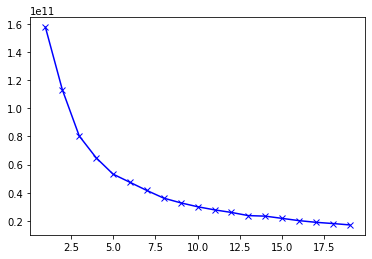

In [40]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In the above elbow graph its show that the number of clusters is around 6

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score
score=silhouette_score(x,model.labels_,metric='euclidean')

In [42]:
print("Silhouette Score:%.3f" %score)

Silhouette Score:0.374


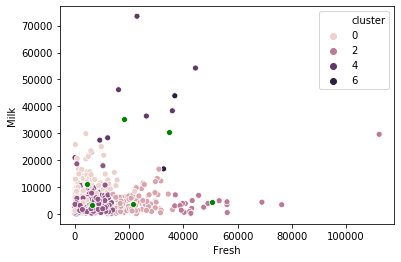

In [43]:
sns.scatterplot(x="Fresh",y="Milk",hue="cluster",data=x)
sns.scatterplot(cen[:,0],cen[:,1],color='green')
plt.show()

As we see the above plot its shows that clustering k coefficient as indicates in green dots
and the silhouette score is 0.375 